# **Applied Statistics: Tasks**

***

This notebook contains code and resources for my tasks from the Applied Statistics module. 

**Author: Brianne McGrath**

***

In [1]:
#import necessary libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## **Task One: Permutations and Combinations - Lady Tasting Tea Experiment**

___

### **Overview:**

In this task, we calculate probabilities in a modified "Lady Tasting Tea" experiment. We examine the likelihood of a participant correctly identifying cups with milk poured first by guessing, focusing on outcomes for exactly six and at least five correct cups.


### **Step One: Define the Cups**

Creating a sequence where the first six cups are milk first, and the last six are tea first. 


In [2]:
# define the cups - first six are milk first, last six are tea first
cups = ['milk'] * 6 + ['tea'] * 6

### **Step Two: Generate Combinations**

Generating all possible combinations of selecting six cups from the twelve available cups. Combinations are stored in `all_combinations`.


In [3]:
# generate all combinations of six cups from twelve
all_combinations = list(itertools.combinations(cups, 6))

### **Step Three: Counting Outcomes**
Counting the number of outcomes where the lady identifies exactly six correct cups and at least five correct cups. These values are stored as `count_6` and `count_at_least_5`, respectively. 


In [4]:
# count outcomes for exactly six and at least five correct cups
count_6 = sum(comb.count('milk') == 6 for comb in all_combinations)
count_at_least_5 = sum(comb.count('milk') >= 5 for comb in all_combinations)

### **Step Four: Calculate Probabilties & Display Results**

Determine probabilies for exactly six correct and at least five correct cups - print results.

In [5]:
# calculate probabilities
total_outcomes = len(all_combinations)
prob_6_correct = count_6 / total_outcomes
prob_at_least_5 = count_at_least_5 / total_outcomes

# print results
print(f"Total Combinations: {total_outcomes}")
print(f"Probability of Exactly Six Correct Cups: {prob_6_correct:.6f}")
print(f"Probability of At Least Five Correct Cups: {prob_at_least_5:.6f}")

Total Combinations: 924
Probability of Exactly Six Correct Cups: 0.001082
Probability of At Least Five Correct Cups: 0.040043


### **Would We Accept Two Errors?** 

In [6]:
# count outcomes for exactly at four correct cups - accepting two errors. 
count_at_least_4 = sum(comb.count('milk') >= 4 for comb in all_combinations)
prob_at_least_4 = count_at_least_4 / total_outcomes
print(f"Probability of At Least Four Correct Cups: {prob_at_least_4:.6f}")

Probability of At Least Four Correct Cups: 0.283550


I believe we should not accept two errors in this experiement due to the significant increase in the probability of achieving at least 4 cups correctly **(0.283550)**. This higher probability compared to **5** **(0.040043)** or **6** **(0.001082)** correctly implies that participants could pass by guessing rather than demonstrating true distinction between the two options. 

While allowing two errors may acknowledge indivual variability, it ultimately undermines the test's integrity. The greater likelihood of passing without genuine skill compromises the experiement's goal of accurately assessing participants' abilities. A stricter threshold is necessary, in my opinion, to ensure that only those who can truly differentiate between the cups are recognised, perserving the integrity of the experiement. 

___

## **Task Two: numpy's Normal Distribution**

___

### **Overview:**
This task evaluates whether a sample generated by `numpy.random.normal()` resembles a true normal distribution using the Shapiro-Wilk test and a histogram with a PDF overlay.


### **Step One: Generate a Sample**

Generating 100,00 values from a normal distribution with a mean of 10.0 and a standard deviation of 3.0, 

In [7]:
# setting mean and standard deviation
mean = 10.0
std_dev = 3.6
sample_size = 100000 # number of values to generate

# generate sample 
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

### **Step Two: Shapiro-Wilk Test for Normality**

The Shapiro-Wilk test checks if a sample comes from a normal distribution. We will apply it to our generated sample.


In [8]:
shapiro_test = stats.shapiro(sample[:5000])  # limit to 5000 values due to test limitations

# print results
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test Statistic: 0.9997217655181885, p-value: 0.7708209753036499


**Interpretation of Results:**
- **Shapiro-Wilk Test Statistic:** 0.999387: Close to 1, implying that the data closely resembles a normal distribution. 
- **p-Value:** 0.091652: Higher than 0.05, which means we don't have enough evidence to reject the null hypothesis. We can assume the data is roughly normal. 

### **Step Three: Plot Histogram**

Creating a histogram of our sample and plotting the normal distribution probabability density.

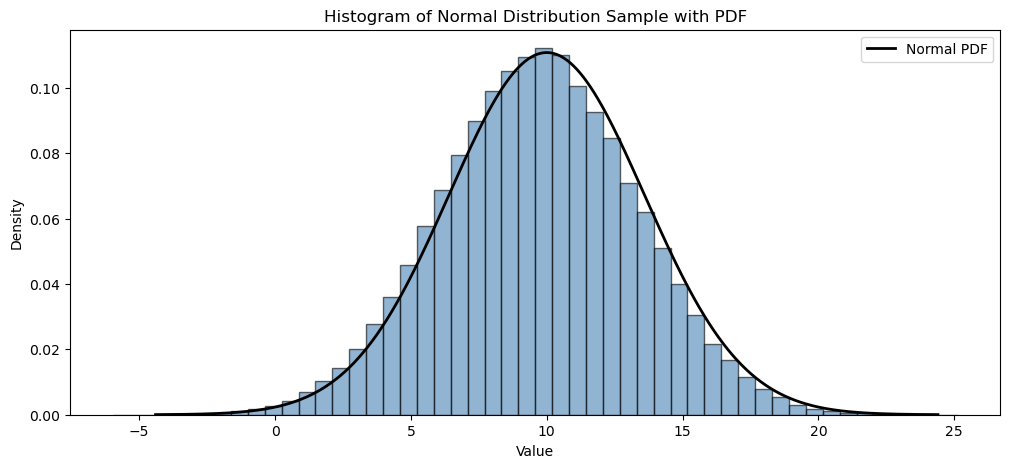

In [9]:
# count occurrences in each bin
counts, bin_edges = np.histogram(sample, bins=50, density=True)

# setting up plot
fig, ax = plt.subplots(figsize=(12, 5))

# create a bar chart from the histogram data
ax.bar(bin_edges[:-1], counts, width=bin_edges[1] - bin_edges[0], color='steelblue', edgecolor='black', alpha=0.6)

# generate x values for the normal PDF overlay
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
pdf = stats.norm.pdf(x, loc=mean, scale=std_dev)

# overlay the normal PDF
ax.plot(x, pdf, 'k-', linewidth=2, label='Normal PDF')
ax.set_title(f'Histogram of Normal Distribution Sample with PDF')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()

plt.show()


___

## **Task Three: $t$-Test Calculation**

___

### **Overview:**

In this task, we calculate the $t$-statistic for a dataset of resting heart rates measured before and after a two-week exercise program. We compare the manually calculated t-statistic to the result from `scipy.stats`.  

### **Step One: Define the Data**

In [10]:
# define the data
hr_before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
hr_after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])



### **Step Two: $t$-test Manual Calculation: (Paired)**

In [11]:
# calculate the differences
differences = hr_before - hr_after

# calculate the mean of the differences
mean_differences = np.mean(differences)

# calculate standard deviation of the differences
std_dev_differences = np.std(differences, ddof=1) 

# calculate the t-statistic
n = len(differences)
t_stat = mean_differences / (std_dev_differences / np.sqrt(n))

# degree of freedom for paired t-test
df = n - 1  

# calculate p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df))  

# Output results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 1.3372274824806283
p-value: 0.21396011317404628


### **Step Three: Compare with `scipy.stats`:**

In [12]:
# t-test with scipy.stats

stats.ttest_rel(hr_before, hr_after)

TtestResult(statistic=1.337227482480628, pvalue=0.21396011317404623, df=9)

**Interpretation of Results:**

- **t-statistic and p-value:** Results from manual calculation and `scipy.stats` align. 
- **Paired $t$-test:** Dataset consisted of paired values, which is why the paired $t$-test was used. 
- **p-value:** 0.21396, which is greater than 0.05, meaning there's not enough evidence to reject the null hypothesis. We conclude that there's no significant difference between the before and after heart rates. 

___

## **Task Four: ANOVA**

___

### **Overview:**

In this task we will estimate the probabilty of commiting a type II error in specific circumstances. 

In [24]:
def simulate_ttest(alpha=0.05):
    # generating samples with different means 
    sample_a = np.random.normal(loc=4.9, scale=0.1, size=100)
    sample_b = np.random.normal(loc=5.0, scale=0.1, size=100)
    sample_c = np.random.normal(loc=5.1, scale=0.1, size=100)
    
    # one-way ANOVA
    f_stat, p_value = stats.f_oneway(sample_a, sample_b, sample_c)
 
    # type ii error: fail to reject the null hypothesis when it should be rejected
    if p_value >= alpha:
        return True  # type ii error
    else:
        return False  #reject null hypothesis correctly  
    
# count type ii errors 
no_type_ii = 0

# run 10000 simulations
for _ in range(10000):
    if simulate_ttest():
        no_type_ii += 1

# show number of type ii errors
no_type_ii
    

0

*Means are quite close to each other and with the small standard deviation and sample size, the difference between the group means are not very large in relation to the sample variation. Hard to detect a true difference - resulting in the null hypothesis being rejected? 

In [28]:
#troubleshotting by changing stdev
def simulate_ttest(alpha=0.05):
    # generating samples with different means 
    sample_a = np.random.normal(loc=4.9, scale=0.5, size=100)
    sample_b = np.random.normal(loc=5.0, scale=0.5, size=100)
    sample_c = np.random.normal(loc=5.1, scale=0.5, size=100)
    
    # one-way ANOVA
    f_stat, p_value = stats.f_oneway(sample_a, sample_b, sample_c)
 
    # type ii error: fail to reject the null hypothesis when it should be rejected
    if p_value >= alpha:
        return True  # type ii error
    else:
        return False  # reject null hypothesis correctly  
    
# count type ii errors 
no_type_ii = 0

# run 10000 simulations
for _ in range(10000):
    if simulate_ttest():
        no_type_ii += 1

# show
no_type_ii
    

2876

*28.76% chance of committing a Type II error in detecting differences between the treatment groups. Changed the std dev which helped - larger variability in the data, making it harder to detect small differences in means, which results in Type II errors (false negatives)
___

## **References:**

### **Task One: Lady Tasting Tea Experiment**

- https://docs.python.org/3/library/itertools.html (Itertools for Combinations)

### **Task Two: numpy's Normal Distribution**
- https://builtin.com/data-science/shapiro-wilk-test#:~:text=Shapiro%2DWilk%20Test%3F-,The%20Shapiro%2DWilk%20test%20is%20a%20hypothesis%20test%20that%20is,generated%20from%20a%20normal%20distribution. ( Shapiro-Wilk Test for Normality)
- https://stackoverflow.com/questions/28217306/error-in-shapiro-test-sample-size-must-be-between (Shapiro-Wilk Test Limitations)
- https://stackoverflow.com/questions/52423635/how-to-plot-normalized-histogram-with-pdf-properly-using-matplotlib (Histogram & Normal PDF)
- https://pmc.ncbi.nlm.nih.gov/articles/PMC4111019/#:~:text=The%20P%20value%20is%20defined,groups%20is%20due%20to%20chance. (p-Values)

### **Task Three: $t$-Test Calculations**
- https://en.wikipedia.org/wiki/Student%27s_t-test (Manual Calculation t-Test)
- https://www.cuemath.com/t-test-formula/ (Manual Calculation t-Test)
- https://www.investopedia.com/terms/d/degrees-of-freedom.asp (DOF)
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind (scipy.stats)

### **Task Four: ANOVA**

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html (Performing ANOVA f_oneway)
- https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/ (Performing ANOVA f_oneway)